# Practical statistics (O'Reilly) _ Chapter 1

#### kaggle_2021-olympics-in-tokyo https://www.kaggle.com/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo?select=Medals.xlsx

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from tabulate import tabulate
import matplotlib.pyplot as plt

# import matplotlib as plt2
# plt2.use('Qt5Agg')

import warnings
warnings.simplefilter("ignore")

In [5]:
medal_count = pd.read_excel('./data/Medals.xlsx')
# print(tabulate(medal_count.head(),  headers= 'keys',tablefmt= 'psql')) # print sql format
medal_count.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


# estimate of location

In [6]:

medal_count['Total'].mean()

11.612903225806452

In [7]:
# weighted mean

# np.average(medal_count['Gold'], weights=medal_count['Total'])
np.average(medal_count['Total'], weights=medal_count['Gold'])

46.832352941176474

In [8]:
trim_mean(medal_count['Total'], 0.1)

6.8933333333333335

In [9]:
# median
medal_count['Total'].median()

4.0

In [10]:
# weighted median
def weighted_median(df, median_col, weight_col):
    df_sorted = df.sort_values(median_col)
    cumsum = df_sorted[weight_col].cumsum()
    cutoff = df_sorted[weight_col].sum()/2
    return df_sorted[cumsum >= cutoff][median_col].iloc[0]

weighted_median(medal_count, 'Total', 'Gold')

40

In [11]:
# percentile

q3 = np.percentile(medal_count['Total'], 75)
q3

11.0

In [12]:
medal_count.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


# Estimate of variability

In [13]:
# Deviation, called erros and residuals, difference between observed values and estimate of location
# variance, average of squared deviation
# std: standard deviation, square root of variance
# these metrics are not robostic to outliers, and they are susceptible to outliers because how they square their deviations
# median absolute deviation is robust against outliers

from statistics import variance
from statistics import stdev
from numpy import mean, median, absolute

variance(medal_count['Gold'])


49.315100514259

In [14]:
stdev(medal_count['Gold'])

7.022471111671376

In [15]:
# mean absolute deviation
mean(absolute(medal_count['Gold'] - mean(medal_count['Gold'])))

4.0048560527228485

In [16]:
# median absolute deviation from the median
median(absolute(medal_count['Gold'] - median(medal_count['Gold'])))

1.0

In [17]:
# estimate based on percentiles
q3, q1 = np.percentile(medal_count['Gold'], [75, 25])
iqr = q3 - q1
iqr

3.0

# data distribution


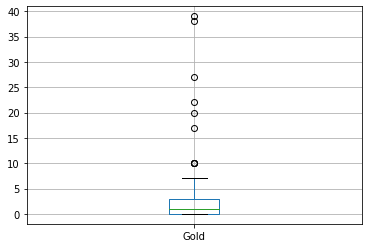

In [18]:
# boxplot

medal_count.boxplot(column='Gold', by=None, ax=None)


In [19]:
# frequency table and histogram

f_table = medal_count.copy()
f_table['freq_cut'] = pd.cut(medal_count['Gold'], 10)
res = f_table.groupby('freq_cut')['Rank'].count().reset_index()
res

,freq_cut,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


(array([50., 11., 11.,  5.,  2.,  4.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ,
        14.3, 15.6, 16.9, 18.2, 19.5, 20.8, 22.1, 23.4, 24.7, 26. , 27.3,
        28.6, 29.9, 31.2, 32.5, 33.8, 35.1, 36.4, 37.7, 39. ]),
 <a list of 30 Patch objects>)

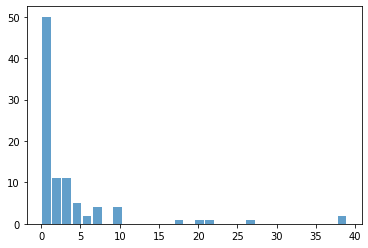

In [20]:
# histogram
plt.hist(x = medal_count['Gold'], bins='auto', alpha= 0.7, rwidth= 0.85)


Text(0.5, 0, 'Gold medal distribution')

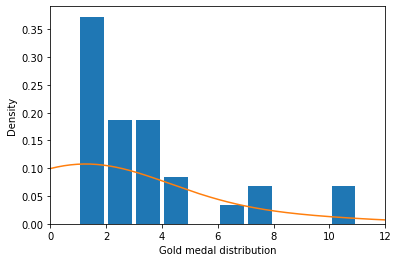

In [21]:
# statistical moments:
# 1st is location: average of all data
# 2nd is variability: how closely values are spread around the mean
# 3rd is skewness: direction of the tail of data, discover through data visualization not a metric
# 4th is kurtosis: propensity for data to have extreme data, discover through data visualization not a metric

# density plot

ax = medal_count['Gold'].plot.hist(density=True, xlim=[0,12], bins=range(1,12), rwidth=0.85)
medal_count['Gold'].plot.density(ax=ax)
ax.set_xlabel('Gold medal distribution')


In [22]:
# explore binary and categorical data

# mode is the value that appears with the most frequency
medal_count['Gold'].mode()

0    0
dtype: int64

Text(0, 0.5, 'Countries')

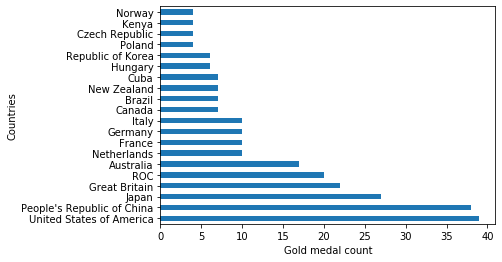

In [23]:
# bar plot
ax = medal_count.iloc[:20,:].plot.barh(x='Team/NOC', y='Gold', legend=False)
ax.set_xlabel('Gold medal count')
ax.set_ylabel('Countries')

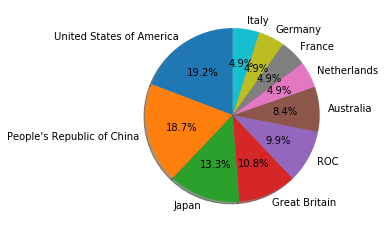

In [30]:
# pie chart

pie_data = medal_count.iloc[:10,:]

ax = plt.pie(pie_data['Gold'], labels=pie_data['Team/NOC'], 
             autopct = '%1.1f%%', 
             shadow=True,
             startangle=90)

Exploration two of more variables, i.e. correlation

In [31]:
# pearson correlation is sensitive to outliers

medal_count.corr()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


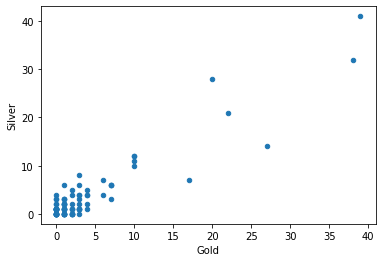

In [32]:
medal_count.plot.scatter(x='Gold', y= 'Silver')

# Hexagonal binning

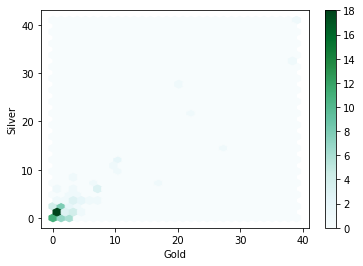

In [33]:
medal_count.plot.hexbin(x='Gold', y='Silver', gridsize=30, sharex=False)

# Contour plot

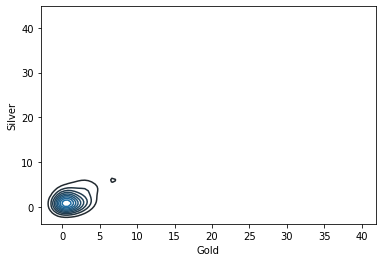

In [37]:
import seaborn as sns

ax = sns.kdeplot(medal_count['Gold'], medal_count['Silver'])



# heatmap

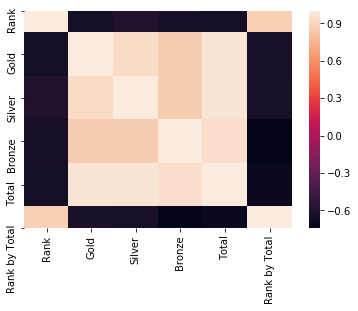

In [38]:
sns.heatmap(medal_count.corr())

# contingency table

In [45]:
crosstab = medal_count[['Team/NOC', 'Gold']].pivot_table(index='Team/NOC', columns='Gold',
                                   aggfunc=lambda x: len(x), margins=True)
crosstab.fillna(0, inplace=False)

Gold,0,1,2,3,4,6,7,10,17,20,22,27,38,39,All
Team/NOC,,,,,,,,,,,,,,,
Argentina,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Armenia,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
Austria,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Azerbaijan,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ukraine,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
United States of America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
Uzbekistan,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# Violinplot

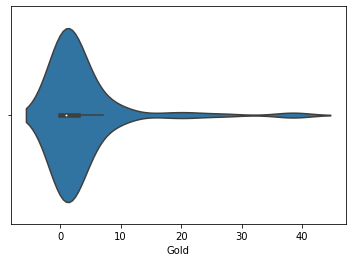

In [46]:
sns.violinplot(x=medal_count['Gold'])

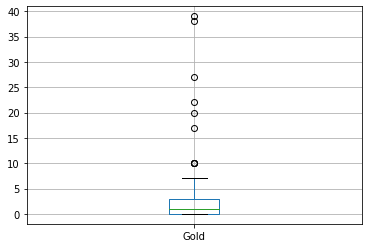

In [47]:
medal_count.boxplot(column='Gold')

# Facet and Trellis plots

In [67]:
# using an existing example of plotly

import plotly.express as px
df = px.data.tips()
fig = px.scatter(df, x='total_bill', y='tip', color='smoker', facet_col='sex')
fig
